LED Block Cipher 3-Class Classification:

Loading LED cipher datasets...
Loaded led_ciphertexts0.csv: 131072 samples
Loaded led_ciphertexts1.csv: 131072 samples
Loaded led_ciphertexts2.csv: 131072 samples
Total samples: 393216
Label distribution:
label
0    131072
1    131072
2    131072
Name: count, dtype: int64

Combining and shuffling data...
First 20 labels after shuffling: [2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2]

Converting ciphertexts to binary features...


100%|██████████| 393216/393216 [00:03<00:00, 130638.23it/s]


Dataset shape: (393216, 64)
Number of classes: 3
Training set shape: (314572, 64)
Testing set shape: (78644, 64)

Building ANN Model...

ANN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,539 (818.51 KB)

 Trainable params: 207,747 (811.51 KB)

 Non-trainable params: 1,792 (7.00 KB)


Training ANN Model...
Epoch 1/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3329 - loss: 1.1952 - val_accuracy: 0.3357 - val_loss: 1.0990 - learning_rate: 0.0010
Epoch 2/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3355 - loss: 1.1003 - val_accuracy: 0.3336 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 3/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3361 - loss: 1.0990 - val_accuracy: 0.3339 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 4/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3376 - loss: 1.0988 - val_accuracy: 0.3363 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 5/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3354 - loss: 1.0988 - val_accuracy: 0.3365 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 6/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3388 - loss: 1.0986 - val_accuracy: 0.3337 - val_loss: 1.0990 - learning_rate: 0.0010
Epoch 7/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accu

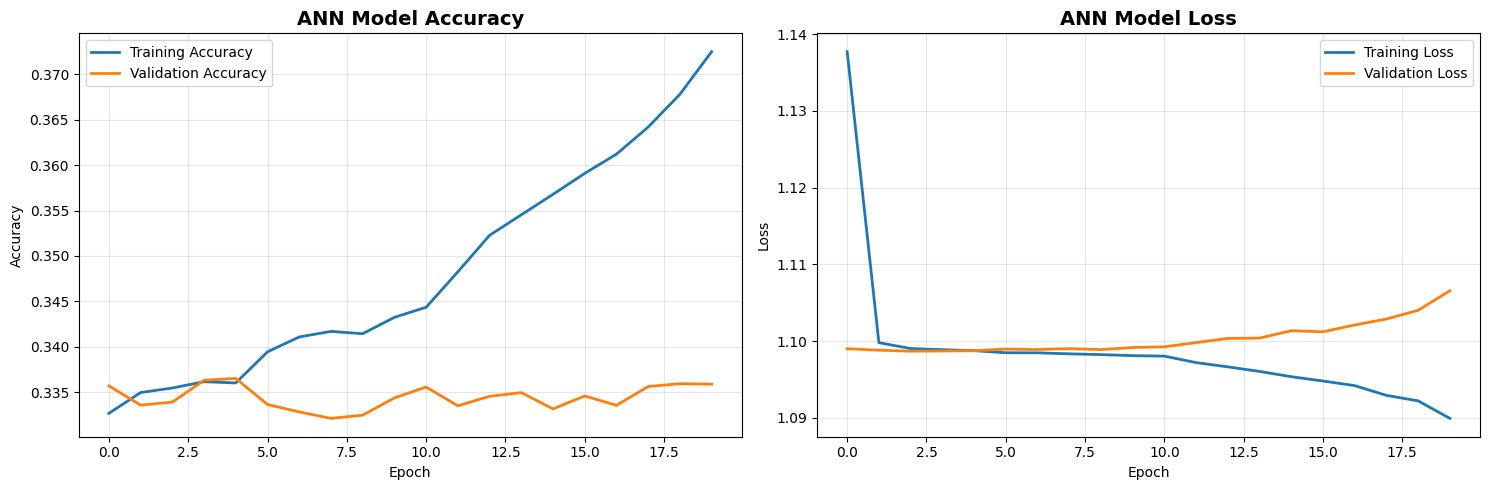


The final accuracy for the ANN Model is: 0.3436


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)
print("LED Block Cipher 3-Class Classification:\n")
def hex_to_binary_array(hex_string):
    hex_string = hex_string.strip().upper()
    binary = bin(int(hex_string, 16))[2:].zfill(len(hex_string) * 4)
    return np.array([int(bit) for bit in binary], dtype=np.float32)
print("Loading LED cipher datasets...")
datasets = []
filenames = ['led_ciphertexts0.csv', 'led_ciphertexts1.csv', 'led_ciphertexts2.csv']
for filename in filenames:
    try:
        df = pd.read_csv(filename)
        datasets.append(df)
        print(f"Loaded {filename}: {len(df)} samples")
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        exit()
combined_df = pd.concat(datasets, ignore_index=True)
print(f"Total samples: {len(combined_df)}")
print(f"Label distribution:\n{combined_df['label'].value_counts().sort_index()}")
print("\nCombining and shuffling data...")
combined_df = shuffle(combined_df, random_state=42).reset_index(drop=True)
print(f"First 20 labels after shuffling: {combined_df['label'].head(20).tolist()}")
print("\nConverting ciphertexts to binary features...")
ciphertext_features = []
for idx, ciphertext in enumerate(tqdm(combined_df['ciphertext'])):
    binary_array = hex_to_binary_array(ciphertext)
    ciphertext_features.append(binary_array)
X = np.array(ciphertext_features) 
y = combined_df['label'].values   
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_val.shape}")
print("\nBuilding ANN Model...")
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],), name='dense_1'),
    BatchNormalization(name='batch_norm_1'),
    Dropout(0.3, name='dropout_1'),    
    Dense(256, activation='relu', name='dense_2'),
    BatchNormalization(name='batch_norm_2'),
    Dropout(0.3, name='dropout_2'),
    Dense(128, activation='relu', name='dense_3'),
    BatchNormalization(name='batch_norm_3'),
    Dropout(0.2, name='dropout_3'),
    Dense(64, activation='relu', name='dense_4'),
    Dropout(0.2, name='dropout_4'),
    Dense(3, activation='softmax', name='output_layer')])
print("\nANN Model Architecture:")
model.summary()
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-6,
        verbose=1)]
print("\nTraining ANN Model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,     
    batch_size=512, 
    callbacks=callbacks,
    verbose=1)
print("\nEvaluating ANN Model...")
y_pred_proba = model.predict(X)
y_pred = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y, y_pred)
print(f"ANN Test Accuracy: {accuracy:.4f}")
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual labels: {y[:5]}")
print("\nANN Classification Report:")
print(classification_report(y, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))
print("\nPlotting ANN training results...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('ANN Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('ANN Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"\nThe final accuracy for the ANN Model is: {accuracy:.4f}")


Reshaping data for Conv1D input...
New input shape for Conv1D: (393216, 64, 1)

Building CNN Model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 62, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 29, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       237,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,419 (954.76 KB)

 Trainable params: 244,419 (954.76 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN Model...
Epoch 1/3
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3336 - loss: 1.0992 - val_accuracy: 0.3334 - val_loss: 1.0986
Epoch 2/3
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3349 - loss: 1.0986 - val_accuracy: 0.3326 - val_loss: 1.0987
Epoch 3/3
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3422 - loss: 1.0982 - val_accuracy: 0.3379 - val_loss: 1.0991

Evaluating CNN Model...
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 11s 864us/step
CNN Test Accuracy: 0.3437
First 5 predictions: [2 1 0 2 0]
First 5 actual labels: [2 0 2 1 2]

CNN Classification Report:
              precision    recall  f1-score   support

     Class 0       0.35      0.32      0.33    131072
     Class 1       0.34      0.38      0.36    131072
     Class 2       0.34      0.34      0.34    131072

    accuracy                           0.34    393216
   macro avg       0.34      0.34      0.34    393216
weighted avg       0.34      0.34      0.34    393216


Plotting CNN tra

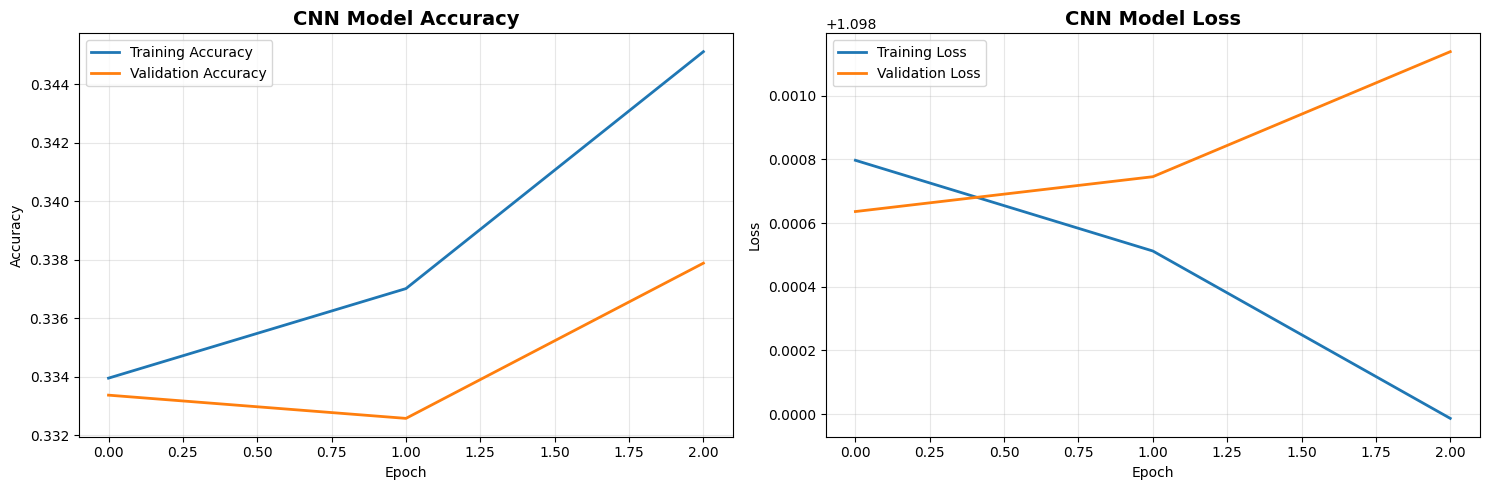


The final accuracy for the CNN Model is: 0.3437


In [2]:
print("\nReshaping data for Conv1D input...")
X_cnn = X.reshape(-1, 64, 1)
X_train_cnn = X_train.reshape(-1, 64, 1)
X_val_cnn = X_val.reshape(-1, 64, 1)
print(f"New input shape for Conv1D: {X_cnn.shape}")
print("\nBuilding CNN Model...")
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
print("\nTraining CNN Model...")
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=3,
    batch_size=512,
    validation_split=0.1,
    verbose=1)
print("\nEvaluating CNN Model...")
y_pred_cnn_proba = cnn_model.predict(X_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_proba, axis=1)
cnn_accuracy = accuracy_score(y, y_pred_cnn)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual labels: {y[:5]}")
print("\nCNN Classification Report:")
print(classification_report(y, y_pred_cnn, target_names=['Class 0', 'Class 1', 'Class 2']))
print("\nPlotting CNN training results...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(cnn_history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('CNN Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax2.plot(cnn_history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(cnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('CNN Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend() 
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"\nThe final accuracy for the CNN Model is: {cnn_accuracy:.4f}")


Confusion Matrix for the ANN Model:


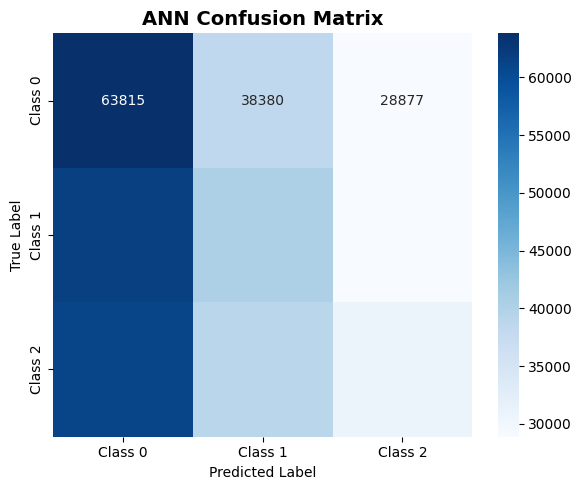


Confusion Matrix for the CNN Model:


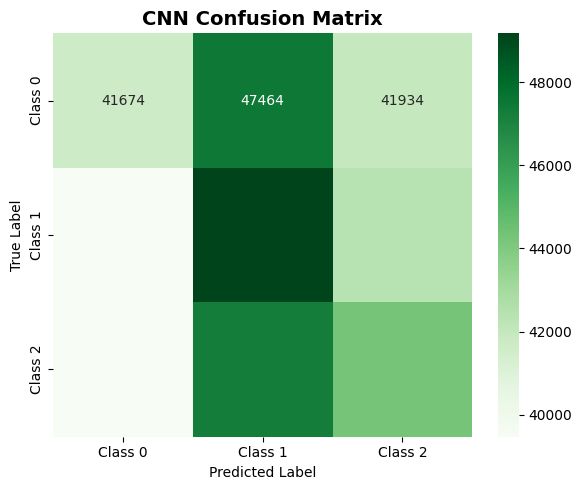

In [3]:
print("\nConfusion Matrix for the ANN Model:")
cm_ann = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("ANN Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
print("\nConfusion Matrix for the CNN Model:")
cm_cnn = confusion_matrix(y, y_pred_cnn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("CNN Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()